In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data.csv')
df_by_artist = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_artist.csv', index_col = 0)

In [3]:
df_beatles = df_main[df_main['artists'] == "['The Beatles']"]
df_beatles.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
2755,0.6670,['The Beatles'],0.901,175547,0.548,0,2ac3duEVpfrlgx4FGoPvxA,0.837000,0,0.1610,-6.808,1,Penny Lane - Take 6 / Instrumental,29,1967-05-26,0.0996,120.775,0.135,1967
2756,0.9220,['The Beatles'],0.508,281493,0.311,0,3FplMj2gYs4cymgvLvl8sO,0.000087,4,0.1250,-12.204,0,A Day In The Life - Take 1,29,1967-05-26,0.0403,84.655,0.200,1967
2798,0.0362,['The Beatles'],0.590,165613,0.448,0,1gJy93yw33uBxRHZn8KFEz,0.000000,3,0.1040,-11.901,1,Lovely Rita,27,1967-05-26,0.0256,86.656,0.680,1967
2841,0.3520,['The Beatles'],0.597,156720,0.660,0,33M8Tg2vvZYsmJIuGa3zZd,0.009130,0,0.6930,-9.499,1,Sgt. Pepper's Lonely Hearts Club Band - Take 9...,29,1967-05-26,0.0771,95.664,0.556,1967
2844,0.2940,['The Beatles'],0.705,165160,0.427,0,4CEoeG1rCKomLu9DtRvX5l,0.000000,4,0.3550,-11.971,1,With A Little Help From My Friends,27,1967-05-26,0.0353,112.294,0.827,1967
3050,0.9550,['The Beatles'],0.408,217227,0.187,0,2Z6L3d10hFhySPcs6lgByo,0.000575,9,0.0766,-15.354,1,Something - Studio Demo,30,1969-09-26,0.0350,139.822,0.243,1969
4856,0.6470,['The Beatles'],0.672,259907,0.529,0,2k7gS1tS9OHeS3e8MatzgJ,0.000000,2,0.1470,-11.566,1,You Know My Name (Look Up The Number) - Remast...,38,1988-03-07,0.2000,118.822,0.696,1988
4878,0.3850,['The Beatles'],0.631,137587,0.748,0,1tM9TBNPjieSOZ2d5VAQ1y,0.308000,2,0.2050,-7.604,1,Lady Madonna - Remastered 2009,36,1988-03-07,0.0300,109.110,0.780,1988
4949,0.1990,['The Beatles'],0.549,140600,0.725,0,7iTjGs5z7opNGCXyurs0Q7,0.000000,0,0.1780,-8.512,1,Bad Boy - Remastered 2009,37,1988-03-07,0.0431,134.640,0.878,1988
7527,0.8360,['The Beatles'],0.521,125227,0.301,0,6EOKwO6WaLal58MSsi6U4W,0.000000,4,0.3980,-7.118,0,Eleanor Rigby,57,2014-01-01,0.0356,137.382,0.621,2014


In [4]:
df2 = df_beatles.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'year']]
df2.reset_index(drop = True)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year
0,0.66700,0.901,0.5480,0.837000,0,0.1610,-6.808,0.0996,120.775,0.135,1967
1,0.92200,0.508,0.3110,0.000087,4,0.1250,-12.204,0.0403,84.655,0.200,1967
2,0.03620,0.590,0.4480,0.000000,3,0.1040,-11.901,0.0256,86.656,0.680,1967
3,0.35200,0.597,0.6600,0.009130,0,0.6930,-9.499,0.0771,95.664,0.556,1967
4,0.29400,0.705,0.4270,0.000000,4,0.3550,-11.971,0.0353,112.294,0.827,1967
...,...,...,...,...,...,...,...,...,...,...,...
405,0.93100,0.442,0.0782,0.895000,4,0.1080,-16.256,0.0374,128.584,0.198,1967
406,0.00561,0.656,0.8650,0.000104,4,0.0853,-8.241,0.0311,135.183,0.938,1988
407,0.31100,0.571,0.7880,0.000004,7,0.2870,-8.159,0.0447,90.138,0.769,1988
408,0.44900,0.553,0.7100,0.000001,2,0.0989,-10.492,0.0314,137.717,0.972,1988


In [5]:
med_data = df_beatles[['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness']].groupby(df_beatles.year).median()
med_data

,acousticness,danceability,energy,instrumentalness,speechiness
year,,,,,
1963,0.5395,0.5265,0.6330,0.000000,0.03645
1964,0.4510,0.6120,0.5930,0.000000,0.03710
1965,0.1595,0.5535,0.5685,0.000000,0.03525
1966,0.3150,0.4880,0.5370,0.000012,0.03820
1967,0.3220,0.5095,0.4750,0.000061,0.04780
1968,0.3790,0.5230,0.5270,0.001170,0.03805
1969,0.1254,0.4785,0.4750,0.001615,0.03475
1970,0.3700,0.5270,0.5355,0.000017,0.04710
1973,0.2190,0.5200,0.5520,0.000006,0.03310


Text(0, 0.5, 'Density')

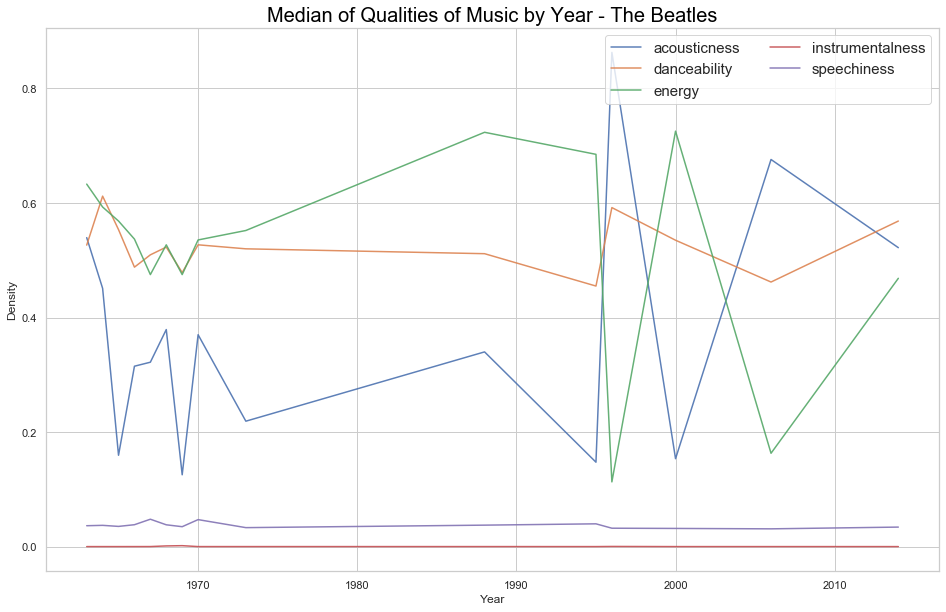

In [7]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in med_data.columns:
    plt.plot(med_data[column], marker='', linewidth= 1.5, alpha=0.9,label = column)


# Add legend
plt.legend(loc = 'upper right', ncol = 2,fontsize= 15)
 
# Add titles
plt.title("Median of Qualities of Music by Year - The Beatles", loc ='center', fontsize=20, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Density")

Text(0.5, 1.0, 'How has acousticnessc hanged over time?')

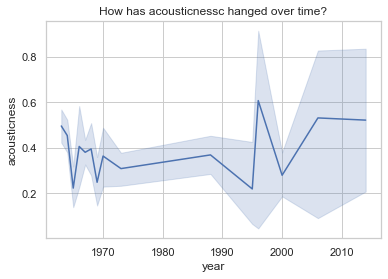

In [8]:
fig1 = sns.lineplot(x = 'year', y = 'acousticness', data = df_beatles)
fig1.set_title("How has acousticnessc hanged over time?")

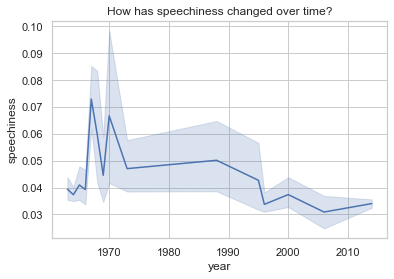

In [9]:
fig2 = sns.lineplot(x = 'year', y = 'speechiness', data = df_beatles).set_title("How has speechiness changed over time?")

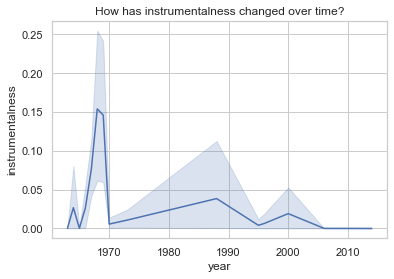

In [10]:
fig3 = sns.lineplot(x = 'year', y = 'instrumentalness', data = df_beatles).set_title("How has instrumentalness changed over time?")

In [11]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness']
x = df2.loc[:, features].values

In [12]:
y = df2.loc[:,['year']].values

In [13]:
x = StandardScaler().fit_transform(x)

In [14]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,speechiness
0,1.081909,2.691908,0.007336,4.657572,0.949109
1,1.981550,-0.094307,-1.167543,-0.307555,-0.270459
2,-1.143554,0.487040,-0.488394,-0.308074,-0.572780
3,-0.029411,0.536668,0.562552,-0.253909,0.486372
4,-0.234035,1.302345,-0.592497,-0.308074,-0.373289


In [15]:
pca = PCA(n_components = 2)

In [16]:
principalComponents = pca.fit_transform(x)

In [17]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [18]:
df_beatles_year = df2[['year']]
df_beatles_year.reset_index(drop = True)
df_beatles_year

,year
2755,1967
2756,1967
2798,1967
2841,1967
2844,1967
...,...
164588,1967
166656,1988
166665,1988
166683,1988


In [19]:
df_beatles_popularity = df_beatles[['popularity']]
df_beatles_popularity.reset_index(drop = True)
df_beatles_popularity

,popularity
2755,29
2756,29
2798,27
2841,29
2844,27
...,...
164588,29
166656,37
166665,37
166683,38


In [46]:
# df_beatles_year.to_csv('/Users/zoebjamal/Desktop/DataRes/new_beatles_year.csv')
# principalDf.to_csv('/Users/zoebjamal/Desktop/DataRes/new_principalDf_beatles.csv')
# df_beatles_popularity.to_csv('/Users/zoebjamal/Desktop/DataRes/beatles_popularity.csv')

In [20]:
finalDf = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/data/new_principalDf_beatles.csv')
finalDf 

,Unnamed: 0,principal component 1,principal component 2,year,popularity
0,0,1.083512,1.124948,1967,29
1,1,2.197144,-0.290303,1967,29
2,2,-0.477146,-0.873695,1967,27
3,3,-0.472037,-0.089187,1967,29
4,4,0.206738,-1.225703,1967,27
...,...,...,...,...,...
405,405,3.538724,2.295084,1967,29
406,406,-2.026605,-0.933978,1988,37
407,407,-0.997087,-0.386184,1988,37
408,408,-0.369684,-0.499921,1988,38


<Figure size 1152x720 with 0 Axes>

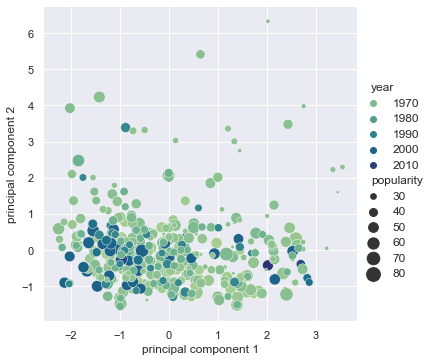

In [22]:
# this figure it based off of the old feature values (included tempo and all that bs)
plt.figure(figsize=(16, 10))
sns.set_theme(style = "darkgrid")
sns.set_context("notebook")
ax = sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'year', size = 'popularity', sizes=(10, 200), palette = "crest", data = finalDf)

<Figure size 1152x720 with 0 Axes>

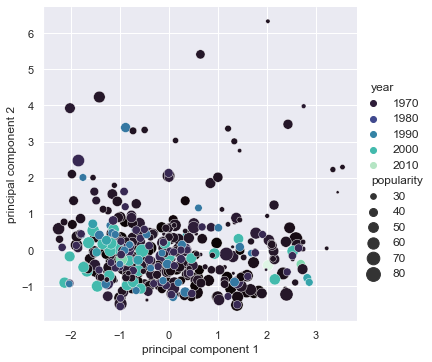

In [48]:
plt.figure(figsize=(16, 10))
sns.set_theme(style = "darkgrid")
sns.set_context("notebook")
ax = sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'year', size = 'popularity', sizes=(10, 200), palette = "mako", data = finalDf)